In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

plt.style.use('seaborn-darkgrid')

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2050:
        demand.append(600_000)
    else:
        demand.append(600_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]


# plot scenarios 
if False:
    laden.plot_demand()

   
    

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = container_objects.Vessel(**container_defaults.handysize_data)
handymax = container_objects.Vessel(**container_defaults.handymax_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 


# 1. Instatiate terminal system

In [5]:
# Terminal_calcs=[]
# stack_cranes = ['rmg', 'rtg', 'sc', 'rs']
# fuel_costs = [0.1, 0.5, 1, 2]
# # Cranes = [container_defaults.rmg', 'rtg', 'sc', 'rs']
# for crane in stack_cranes:   
#     Terminal_dummy = container_system.System(startyear = startyear, 
#                                              lifecycle = lifecycle, 
#                                              elements = demand + vessels, 
#                                              operational_hours = 7665,   # example Wijnand
#                                              debug=False,
#                                              stack_equipment = crane,
#                                              laden_stack = crane) 
#     NPV=Terminal_dummy.simulate()
#     Terminal_calcs.append(NPV)
# print(Terminal_calcs)


In [6]:
# def chunkIt(seq, num):
#     avg = len(seq) / float(num)
#     out = []
#     last = 0.0

#     while last < len(seq):
#         out.append(seq[int(last):int(last + avg)])
#         last += avg

#     return out

In [7]:
# Terminal_calcs=[]
# stack_cranes = ['rmg', 'rtg', 'sc', 'rs']
# fuel_costs = [0.1, 0.5, 1, 2]
# # Cranes = [container_defaults.rmg', 'rtg', 'sc', 'rs']

# for crane in stack_cranes:
#     for i in fuel_costs: 
#         Terminal_dummy = container_system.System(startyear = startyear, 
#                                                  lifecycle = lifecycle, 
#                                                  elements = demand + vessels, 
#                                                  operational_hours = 7665,   # example Wijnand
#                                                  debug=False,
#                                                  stack_equipment = crane,
#                                                  laden_stack = crane,
#                                                  fuel_price = i ) 
#         NPV=Terminal_dummy.simulate()
#         Terminal_calcs.append(NPV)
# print(Terminal_calcs)


In [8]:
# out=chunkIt(Terminal_calcs, len(fuel_costs))

# rmg=out[0]
# rtg=out[1]
# sc=out[2]
# rs=out[3]
# print(rmg)

# ind = np.arange(4)  # the x locations for the groups
# width = 0.1       # the width of the bars


# fig, ax = plt.subplots(figsize=(16, 7))
# ax.bar(ind, rmg, width = width, label ="RMG")
# ax.bar(ind+width, rtg, width = width, label="RTG")
# ax.bar(ind+2*width, sc, width = width, label="Straddle carrier")
# ax.bar(ind+3*width, rs, width = width, label="Reach stacker")
# ax.set_xticks(ind+3*width/3)
# ax.set_xticklabels(('very low', 'low', 'mid', 'high'))
# plt.ylabel('Net present value')
# plt.xlabel('Fuel price')
# plt.legend()
# ax.set_title('NPV per equipment for varying fuel price')
# plt.show()
# plt.savefig('C:/Users/908538/Google Drive/Afstuderen/02. Model/Masterfile/Plots/fuel.png', dpi=400)


In [9]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 7350,  
                         debug=True,
                         crane_type_defaults=container_defaults.sts_crane_data) 


# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [10]:
Terminal.simulate()


Simulate year: 2020
  Total vessel calls: 200
     Handysize calls: 0
     Handymax calls: 0
     Panamax calls: 200
  Total cargo volume: 600000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add Quay to elements
     Berth occupancy planned (after adding quay): inf
     Berth occupancy online (after adding quay): inf
  *** add STS crane to elements
     Berth occupancy planned (after adding crane): 1.7035040431266846
     Berth o

     Revenues (demand): 90000000
     Revenues (throughput): 0
     Revenues (demand): 90000000
     Revenues (throughput): 0
     Revenues (demand): 90000000
     Revenues (throughput): 90000000
     Revenues (demand): 90000000
     Revenues (throughput): 90000000
     Revenues (demand): 90000000
     Revenues (throughput): 90000000
     Revenues (demand): 90000000
     Revenues (throughput): 90000000
     Revenues (demand): 90000000
     Revenues (throughput): 90000000
     Revenues (demand): 90000000
     Revenues (throughput): 90000000
     Revenues (demand): 90000000
     Revenues (throughput): 90000000
     Revenues (demand): 90000000
     Revenues (throughput): 90000000


500265441.5366545

## Report all elements

In [11]:
if False: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

In [12]:
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

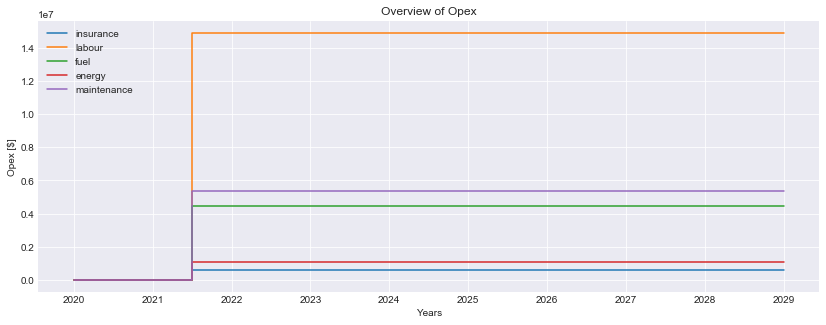

In [13]:
Terminal.opex_plot(cash_flows)

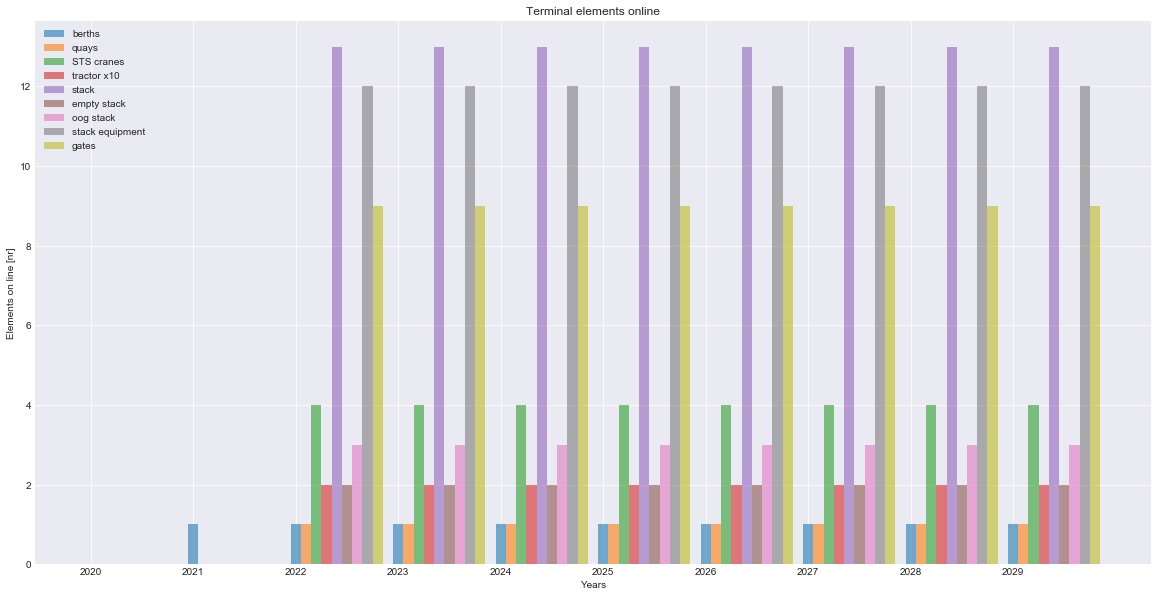

In [14]:
Terminal.terminal_elements_plot()

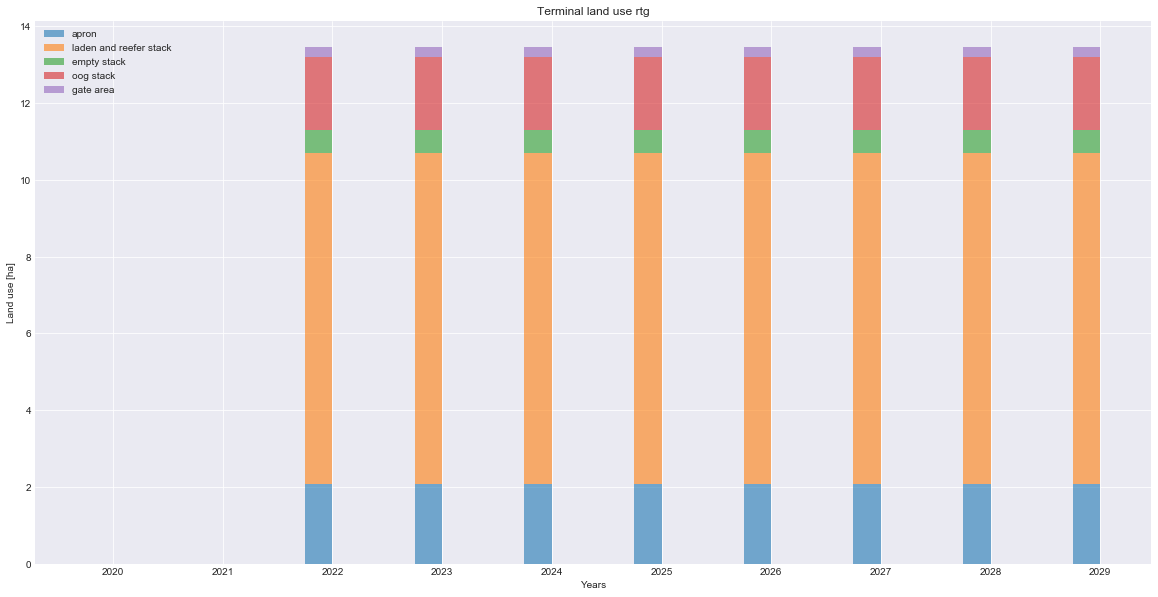

In [15]:
Terminal.land_use_plot()

In [16]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

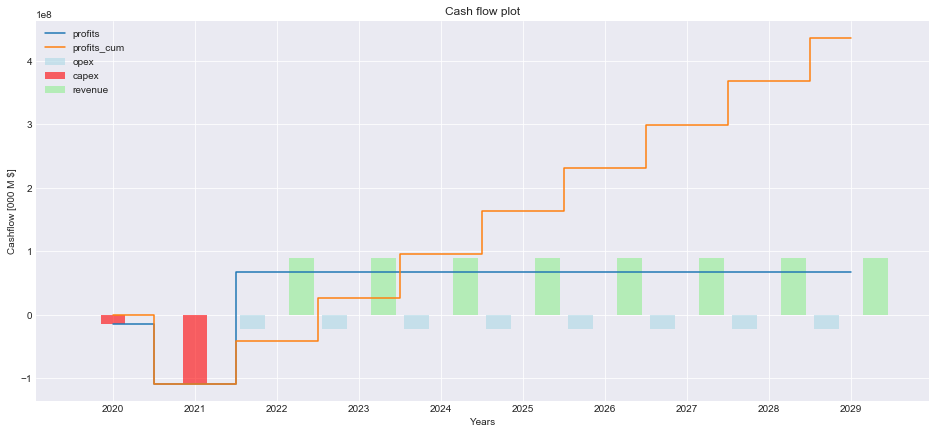

In [17]:
Terminal.cashflow_plot(cash_flows)

## SandBox

In [18]:
Terminal.NPV()

500265441.5366545